In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymatgen.util.coord import lattice_points_in_supercell

from far_heaa.grids_and_combinations.combination_generation import MultinaryCombinations
from far_heaa.io.json_handler import JSONHandler
from far_heaa.math_operations.thermo_calculations import ThermoMaths
from make_dft_calc.extract_elements import element_list

Cr-Fe 0.3273
Cr-Hf 0.657
Cr-Mo 0.3755
Cr-Nb 0.5252
Cr-Ta 0.4082
Cr-Ti 0.059
Cr-V -0.2218
Cr-W 0.4058
Cr-Zr 1.0666
Fe-Hf -0.0793
Fe-Mo 0.5254
Fe-Nb 0.2312
Fe-Ta 0.0724
Fe-Ti -0.6575
Fe-V -0.4308
Fe-W 0.6003
Fe-Zr 0.2436
Hf-Mo -0.322
Hf-Nb -0.1349
Hf-Ta 0.0498
Hf-Ti -0.178
Hf-V 0.3287
Hf-W 0.0235
Hf-Zr -0.1526
Mo-Nb -0.3188
Mo-Ta -0.4709
Mo-Ti -0.5828
Mo-V -0.4019
Mo-W 0.0084
Mo-Zr 0.0706
Nb-Ta 0.023
Nb-Ti -0.0722
Nb-V 0.2836
Nb-W -0.1735
Nb-Zr 0.1098
Ta-Ti 0.0457
Ta-V 0.2387
Ta-W -0.2986
Ta-Zr 0.2926
Ti-V 0.0329
Ti-W -0.3179
Ti-Zr 0.0182
V-W -0.2578
V-Zr 0.6092
W-Zr 0.4183


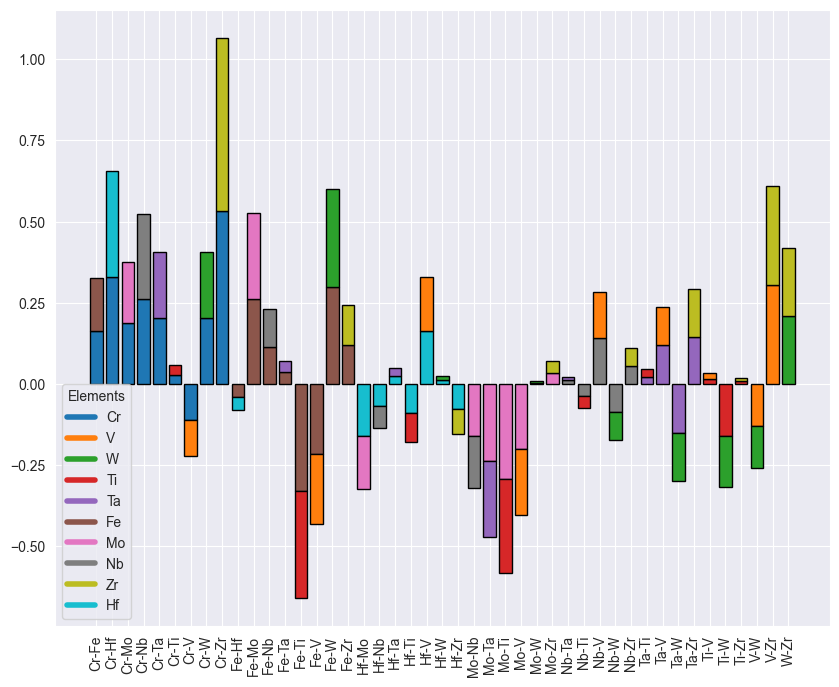

In [20]:
from far_heaa.io.text_handler import TextHandler

# element_list = TextHandler.extract_ele_list(
#                 folder_path='../database', file_name="database_element_list"
#             ) 
element_list = ['Cr', 'V', 'W', 'Ti', 'Ta', 'Fe', 'Mo', 'Nb', 'Zr', 'Hf']
data = JSONHandler.load_json(folder_path='../database', file_name='bokas_omegas_processed')
mol_grid_size = 5
x = np.linspace(0, 1, mol_grid_size)
lattice = 'BCC'

# Get binaries and corresponding omega values
binaries = list(MultinaryCombinations.create_multinary(element_list=element_list, no_comb=[2]).values())[0]
omegas = [data[i][lattice] for i in binaries]
# omegas = sorted(omegas)

# Define colors for each element
element_colors = {element: plt.cm.tab20(i / len(element_list)) for i, element in enumerate(element_list)}

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Loop to create each binary bar with two halves (bottom and top colors)
for idx, (binary, omega) in enumerate(zip(binaries, omegas)):
    element1, element2 = binary.split('-')  # Assuming binaries are in the format 'Element1-Element2'
    color1 = element_colors[element1]
    color2 = element_colors[element2]
    print(binary, omega)
    # Plot the bottom half of the bar with the color of the first element
    ax.bar(idx, omega / 2, color=color1, width=0.8, edgecolor='black', label=element1 if idx == 0 else "")

    # Plot the top half of the bar with the color of the second element
    ax.bar(idx, omega / 2, bottom=omega / 2, color=color2, width=0.8, edgecolor='black',
           label=element2 if idx == 0 else "")

# Set labels and rotation
ax.set_xticks(range(len(binaries)))
ax.set_xticklabels(binaries, rotation=90)

# Add legend for clarity
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in element_colors.values()]
ax.legend(handles, element_colors.keys(), title="Elements")

plt.show()

In [40]:
from tqdm import tqdm
hc_list = []
ha_list = []
satisfy = 0
total = 0
ha_total = 0
for n in range(3, 10):
    n_naries = list(MultinaryCombinations.create_multinary(element_list=element_list, no_comb=[n]).values())[0]
    for alloy in tqdm(n_naries):
        ele_alloy = alloy.split('-')
        binary_pairs = list(MultinaryCombinations.create_multinary(element_list=ele_alloy, no_comb=[2]).values())[0]
        for lattice in ['BCC', 'HCP', 'FCC']:
            for element in ele_alloy:
                ha = sum([data[i][lattice] for i in binary_pairs if element in i])
                hc = sum([data[i][lattice] for i in binary_pairs if element not in i])
                ha_total += hc
                total += 1
                if hc <= 0 <= ha:
                    continue
                elif abs(hc/(ha + 1e-5)) >= 0.5 or hc >= 0 >= ha:
                    satisfy += 1
            
print(satisfy, total, ha_total/total)
            

100%|██████████| 10/10 [00:00<00:00, 5941.78it/s]

10341 15030 -0.7195280904856999


Text(0.5, 0, 'n (Order)')

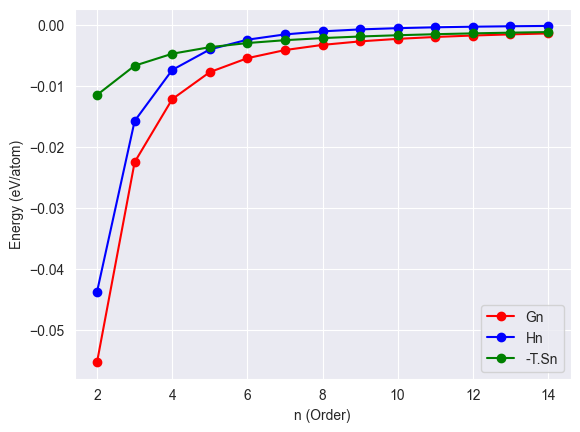

In [39]:
n = np.array(list(range(2, 15)))
ha = -0.35 #average found across
hc = -0.5*ha
delta_hn = 1/(n*(n+1))**2
delta_hn *= ((-2*n-1)*hc + n*ha)
delta_sn = 8.314e-5*np.log(n/(n-1))
T = 200
delta_gn = delta_hn - T*delta_sn


plt.plot(n, delta_gn, c = 'red', marker = 'o')
plt.plot(n, delta_hn, c = 'blue', marker = 'o')
plt.plot(n, -T*delta_sn, c = 'green', marker = 'o')
plt.legend(['Gn','Hn','-T.Sn'])
plt.ylabel('Energy (eV/atom)')
plt.xlabel('n (Order)')